In [35]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import Symbol, solve, nsolve
from scipy.optimize import fsolve
import math
from timeit import default_timer as timer

#make size of axis tick labels larger
plt.rcParams['xtick.labelsize'], plt.rcParams['ytick.labelsize'] = 15, 15

In [37]:
#%% import the QCM-D data
import_data = pd.read_table('corrected_MXene_H2Oresponse.txt')
import_data

,time_hours,df_1,df_3,df_5,df_7,df_9,dd_1,dd_3,dd_5,dd_7,dd_9,RH_%
0,0.000000,-0.096649,-0.000641,0.015444,0.005438,0.032666,-0.033136,-0.002510,-0.000178,0.000098,0.000035,1.5
1,0.092978,-0.065189,0.140134,0.157119,0.306485,0.189062,-0.054228,-0.004909,-0.002687,-0.008710,0.113029,1.5
2,0.185947,-0.051489,0.230194,0.268460,0.434926,0.363473,-0.073062,-0.007218,-0.002550,-0.007824,0.043896,1.5
3,0.278497,-0.048923,0.266867,0.334946,0.456696,0.222100,-0.087445,-0.009637,-0.002066,-0.002432,0.100136,1.5
4,0.371381,0.048047,0.415325,0.510873,0.592091,0.190992,-0.101730,-0.010410,-0.001288,-0.008495,0.087163,1.5
5,0.464386,0.118590,0.515523,0.610176,0.653999,0.369881,-0.117663,-0.013252,0.000035,-0.006404,0.053119,1.5
6,0.557764,0.185678,0.628378,0.698412,0.610033,0.227609,-0.122968,-0.016343,0.005192,-0.003769,0.146147,1.5
7,0.650978,0.213290,0.616121,0.659992,0.686807,-0.146521,-0.128749,-0.018872,0.013080,-0.011350,0.034533,1.5
8,0.743886,0.302279,0.740162,0.792884,0.727301,0.046859,-0.132564,-0.018093,0.007022,0.000644,0.128187,1.5
9,0.836947,0.306908,0.760922,0.794556,0.800927,0.233324,-0.131043,-0.023713,0.015363,0.011930,0.078512,1.5


In [38]:
#%% define frequency shift and resonant frequency at each overtone
overtone_number = np.array([1,3,5,7,9])
time = import_data['time_hours']
rh = import_data['RH_%']
delta_freqs = import_data[['df_1', 'df_3', 'df_5', 'df_7', 'df_9']].values
delta_Ds = import_data[['dd_1', 'dd_3', 'dd_5', 'dd_7', 'dd_9']].values
res_freqs = np.array([4984790, 14936300, 24888000, 34836700, 44784300])
res_freqs

array([ 4984790, 14936300, 24888000, 34836700, 44784300])

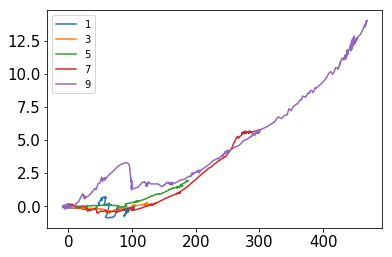

In [39]:
#%% calculate delta D over delta f
for i in range(len(delta_freqs[0])):
    dd_over_df = -delta_Ds[100:,i] / delta_freqs[100:,i]
    
    plt.plot(-delta_freqs[:,i], delta_Ds[:,i], label=format(i*2+1))
    #plt.plot(time[100:], dd_over_df, label=format(i+1))
plt.legend()
plt.show()



In [40]:
#%% define constants
#dry air at 300K (26.85 deg C) has:
mu_L = 1.846 #dynamic viscosity  (kg/m*s)
rho_L = 1.177 #density (kg/m^3)

## Model

The following model comes from equations (20) and (21) in the paper by Voinova:

Vionova, M.V., Rodahl, M., Jonson, M. and Kasemo, B., 1999. Viscoelastic acoustic response of layered polymer films at fluid-solid interfaces: continuum mechanics approach. Physica Scripta, 59(5), p.391.

![Equations from paper](eqns_20_and_21.jpg)

1


C:\Users\a6q\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


3
5
7


C:\Users\a6q\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


9
total time (s): 14.96 sec


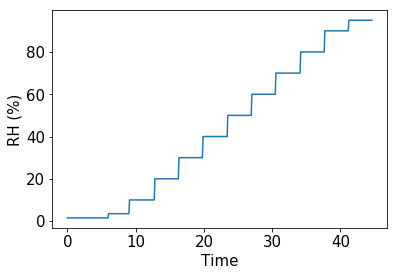

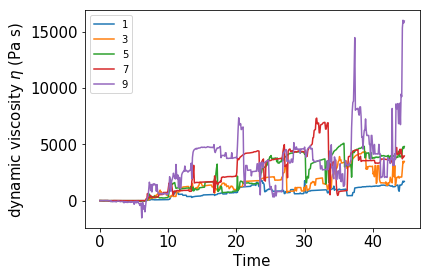

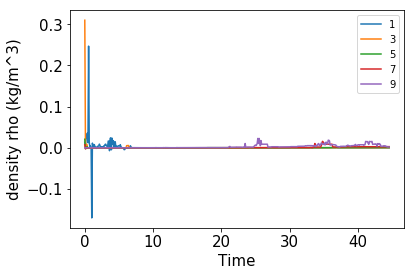

In [53]:
#%% calculate rho and eta


calc_eta = np.zeros((len(time), len(overtone_number)))
calc_rho = np.zeros_like(calc_eta)

begin = timer()

for n in range(len(overtone_number)): #loop over each harmonic
    
    harmonic = overtone_number[n]
    print(harmonic)
    
    for i in range(len(delta_freqs[:,n])): #loop over each value of frequancy and dissipation

        def eqns20_21(variables): #define functions that we solve for
            eta, rho = variables
    
            h_q = 1e-3 #thickness of quartz (m)
            mu_q = 2.947e10 #shear modulus of quartz (kg/m*s^2, or Pa)
            rho_q = 2648 #density of quartz (kg/m^3)
    
            delta_f = delta_freqs[i, n]*harmonic #frequency shift
            delta_d  = delta_Ds[i, n]*harmonic*1e-6 #dissipation
            
            f0 = res_freqs[n]
            w = 2*np.pi*f0 #omega, angular frequency (rad/sec)
            
            
            mu = 10e9 #10 GPa elastic shear modulus
            #rho = 1 #film density (1000 kg/m^3)
    
            #prefactor of equation 20
            pre20 =  (1/(2*np.pi*rho_q*h_q))*np.sqrt(1/2) 
            #prefactor of equation 21
            pre21 = (1/(np.pi*f0*rho_q*h_q))*np.sqrt(1/2) 
            #small expression that shows up 4 times: u^2 + n^2*w^2
            se = mu**2 + eta**2 * w**2
            #equation 20 factor
            f20 = eta*w*np.sqrt((np.sqrt(se)+mu)/(se)) - mu*np.sqrt((np.sqrt(se)-mu)/(se))
            #equation 21 factor
            f21 = eta*w*np.sqrt((np.sqrt(se)-mu)/(se)) + mu*np.sqrt((np.sqrt(se)+mu)/(se))
 
            # eqns 20 & 21 set = 0
            eqn20 = (delta_f/np.sqrt(np.abs(rho))) + (pre20 * f20) #multiply by harmonic if data is d/n, D/n
            eqn21 = (delta_d/np.sqrt(np.abs(rho))) - (pre21 * f21)

            return (eqn20, eqn21)

        eta, rho =  fsolve(eqns20_21, (1000, 1E-5)) #1e2, 1e9
    
        calc_eta[i,n] = eta
        calc_rho[i,n] = rho

        #print('iteration '+format(i)+'/'+format(len(delta_freqs[:,1])))
        #print(eqns20_21((eta, mu)))


end = timer()
total_time = end-begin
print('total time (s): %.2f sec' %total_time)
        
plt.plot(time, rh); plt.xlabel('Time', fontsize=15); plt.ylabel('RH (%)', fontsize=15)
plt.show()       

for i in range(len(overtone_number)): plt.plot(time, calc_eta[:,i], label=format(overtone_number[i]))
plt.xlabel('Time', fontsize=15)
plt.ylabel('dynamic viscosity $\eta$ (Pa s)', fontsize=15)
plt.legend()
plt.show()

for i in range(len(overtone_number)): plt.plot(time, calc_rho[:,i], label=format(overtone_number[i]))
plt.xlabel('Time', fontsize=15)
plt.ylabel('density rho (kg/m^3)', fontsize=15)
plt.legend()
plt.show()

In [50]:
calc_rho

array([[  1.05638826e-03,  -8.98477842e-04,  -1.26583096e-04,
         -1.00666116e-05,  -2.79034030e-06],
       [  1.57701997e-04,   4.05098922e-06,  -4.92581079e-05,
         -1.11422043e-05,   7.91162491e-06],
       [  2.49553945e-04,  -4.84580825e-05,   1.55247096e-05,
         -9.06114907e-07,   2.39420336e-06],
       ..., 
       [  1.09077836e-04,   3.81043199e-05,   3.80459377e-05,
          7.92312126e-05,   1.70830056e-04],
       [  9.07176724e-05,  -4.43689722e-05,   3.45780531e-05,
          7.86246900e-05,   1.64296444e-04],
       [  1.46228745e-05,  -3.15806361e-05,   3.78769386e-05,
          8.01232854e-05,   1.70150413e-04]])

1


C:\Users\a6q\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\a6q\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


3


C:\Users\a6q\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)


5
7
9
total time (s): 58.82 sec


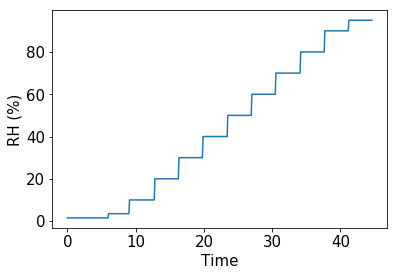

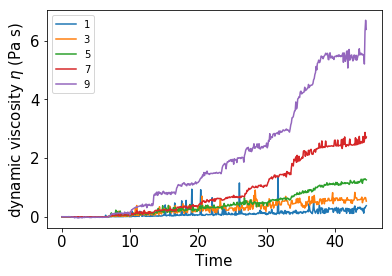

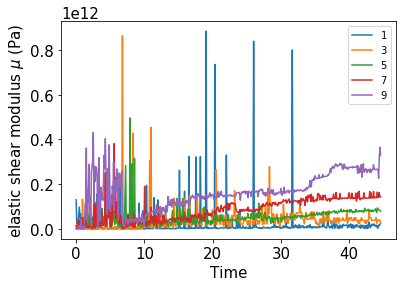

In [54]:
#%% calculate eta and mu

calc_eta = np.zeros((len(time), len(overtone_number)))
calc_mu = np.zeros_like(calc_eta)

begin = timer()

for n in range(len(overtone_number)): #loop over each harmonic
    
    harmonic = overtone_number[n]
    print(harmonic)
    
    for i in range(len(delta_freqs[:,n])): #loop over each value of frequancy and dissipation

        def eqns20_21(variables): #define functions that we solve for
            eta, mu = variables
    
            delta_f = delta_freqs[i, n]*harmonic #frequency shift
            delta_d  = delta_Ds[i, n]*harmonic*1e-6 #dissipation
            rho = 2000 #film density (1000 kg/m^3)
            h_q = 1e-3 #thickness of quartz (m)
            mu_q = 2.947e10 #shear modulus of quartz (kg/m*s^2, or Pa)
            rho_q = 2648 #density of quartz (kg/m^3)
    
            f0 = res_freqs[n]
            w = 2*np.pi*f0 #omega, angular frequency (rad/sec)
    
            #prefactor of equation 20
            pre20 =  (1/(2*np.pi*rho_q*h_q))*np.sqrt(rho/2) 
            #prefactor of equation 21
            pre21 = (1/(np.pi*f0*rho_q*h_q))*np.sqrt(rho/2) 
            #small expression that shows up 4 times: u^2 + n^2*w^2
            se = mu**2 + eta**2 * w**2
            #equation 20 factor
            f20 = eta*w*np.sqrt((np.sqrt(se)+mu)/(se)) - mu*np.sqrt((np.sqrt(se)-mu)/(se))
            #equation 21 factor
            f21 = eta*w*np.sqrt((np.sqrt(se)-mu)/(se)) + mu*np.sqrt((np.sqrt(se)+mu)/(se))
 
            # eqns 20 & 21 set = 0
            eqn20 = delta_f + (pre20 * f20) #multiple by harmonic if data is d/n, D/n
            eqn21 = delta_d - (pre21 * f21)

            return (eqn20, eqn21)

        eta, mu =  fsolve(eqns20_21, (1e2, 1e12)) #1e2, 1e9
    
        calc_eta[i,n] = eta
        calc_mu[i,n] = mu

        #print('iteration '+format(i)+'/'+format(len(delta_freqs[:,1])))
        #print(eqns20_21((eta, mu)))


end = timer()
total_time = end-begin
print('total time (s): %.2f sec' %total_time)
        
plt.plot(time, rh); plt.xlabel('Time', fontsize=15); plt.ylabel('RH (%)', fontsize=15)
plt.show()       

for i in range(len(overtone_number)): plt.plot(time, calc_eta[:,i], label=format(overtone_number[i]))
plt.xlabel('Time', fontsize=15)
plt.ylabel('dynamic viscosity $\eta$ (Pa s)', fontsize=15)
plt.legend()
plt.show()

for i in range(len(overtone_number)): plt.plot(time, calc_mu[:,i], label=format(overtone_number[i]))
plt.xlabel('Time', fontsize=15)
plt.ylabel('elastic shear modulus $\mu$ (Pa)', fontsize=15)
plt.legend()
plt.show()

In [57]:
import csv
with open('save_eta.csv','w') as save_file:
    writer = csv.writer(save_file, lineterminator='\n')
    for row in calc_eta:
        writer.writerow(row)
save_file.close()

import csv
with open('save_mu.csv','w') as save_file:
    writer = csv.writer(save_file, lineterminator='\n')
    for row in calc_mu:
        writer.writerow(row)
save_file.close()

import csv
with open('save_time.csv','w') as save_file:
    writer = csv.writer(save_file, lineterminator='\n')
    for row in np.reshape(time, (-1,1)):
        writer.writerow(row)
save_file.close()

C:\Users\a6q\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
